# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()

# Display the number of mice
num_mice
print(num_mice)

249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Optional: Get all the data for the duplicate mouse ID.
# Find the Mouse ID(s) that have duplicates
duplicate_mouse_id = duplicate_mice['Mouse ID'].unique()
# Get all the data for the duplicate mouse ID(s)
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_id)]

# Display the data for the duplicate mouse ID(s)
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Get the unique ID(s) of the duplicate mouse
duplicate_mouse_id = duplicate_mice['Mouse ID'].unique()

# Create a clean DataFrame by dropping the duplicate mouse ID(s)
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_id)]

# Display the clean DataFrame for preview
cleaned_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of unique mice in the clean DataFrame
num_cleaned_mice = cleaned_data["Mouse ID"].nunique()

# Display the number of mice in the clean DataFrame
print(num_cleaned_mice)


248


## Summary Statistics

In [18]:
# Group the data by drug regimen and calculate summary statistics
summary_stats = cleaned_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    variance_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_dev_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', 'sem')
)

# Display the summary statistics DataFrame
summary_stats


,mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_dev_tumor_volume,sem_tumor_volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Generate summary statistics using the aggregation method in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
)

# Display the summary statistics DataFrame
summary_stats


,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

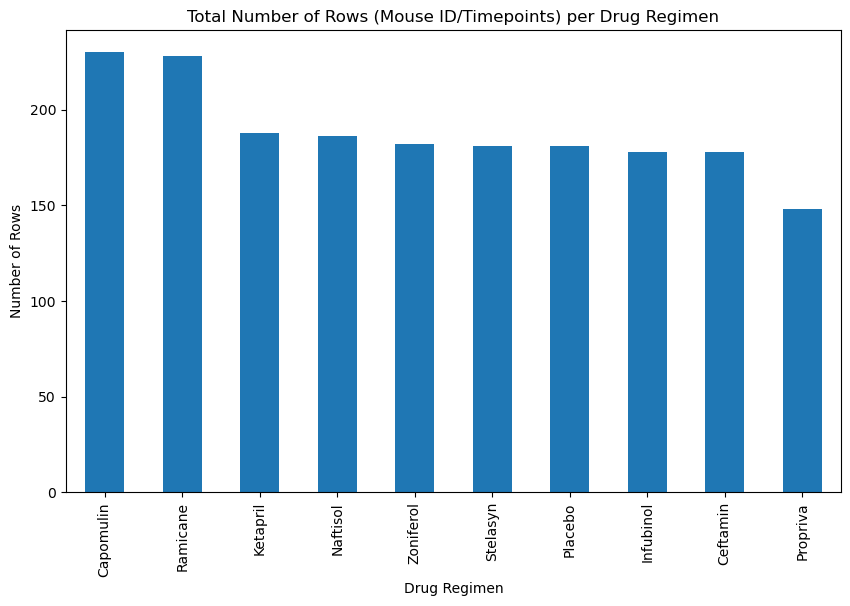

In [22]:
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
counts_per_regimen = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot using Pandas
counts_per_regimen.plot(kind='bar', figsize=(10,6))

# Set the title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display the plot
plt.show()


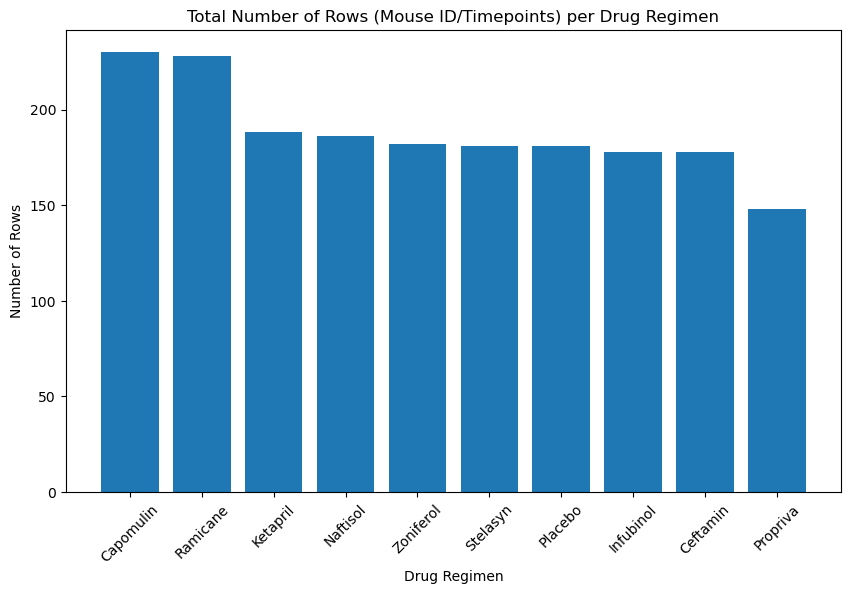

In [24]:
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
counts_per_regimen = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot using pyplot
plt.figure(figsize=(10,6))
plt.bar(counts_per_regimen.index, counts_per_regimen.values)

# Set the title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


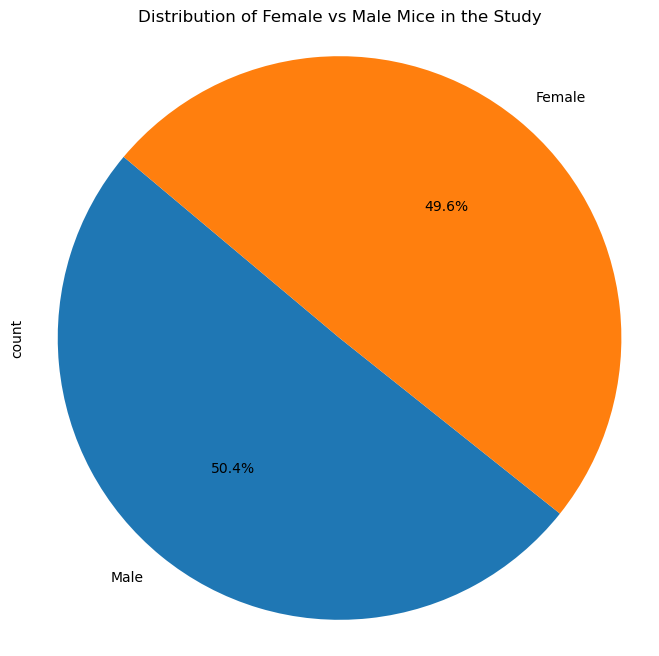

In [13]:
# Get the unique mice with their gender
unique_mice = cleaned_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]

# Count the number of unique male and female mice
gender_distribution = unique_mice['Sex'].value_counts()

# Generate a pie chart using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8,8))

# Set the title
plt.title('Distribution of Female vs Male Mice in the Study')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()



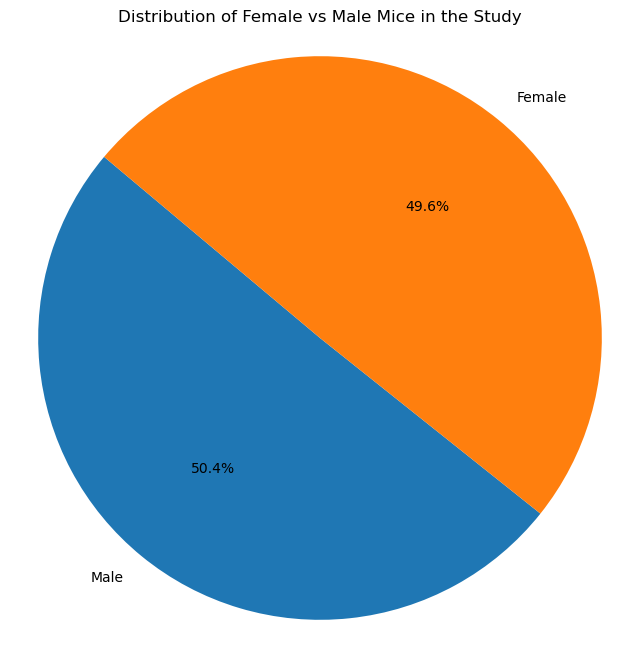

In [26]:
# Get the unique mice with their gender
unique_mice = cleaned_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]

# Count the number of unique male and female mice
gender_distribution = unique_mice['Sex'].value_counts()

# Generate a pie chart using pyplot
plt.figure(figsize=(8,8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Distribution of Female vs Male Mice in the Study')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()



## Quartiles, Outliers and Boxplots

In [28]:
# Get the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the data for the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

# Display the resulting DataFrame
final_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [30]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Initialize a dictionary to store IQR and outliers information
iqr_outliers = {}


# Loop through each treatment
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add the tumor volume data to the list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR for the tumor volumes
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine the outlier bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Find any potential outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Store the results in the dictionary
    iqr_outliers[treatment] = {
        'Lower Quartile': lowerq,
        'Upper Quartile': upperq,
        'IQR': iqr,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': outliers
    }

# Display the IQR and outliers information
iqr_outliers



{'Capomulin': {'Lower Quartile': 32.37735684,
  'Upper Quartile': 40.1592203,
  'IQR': 7.781863460000004,
  'Lower Bound': 20.70456164999999,
  'Upper Bound': 51.83201549,
  'Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)},
 'Ramicane': {'Lower Quartile': 31.56046955,
  'Upper Quartile': 40.65900627,
  'IQR': 9.098536719999998,
  'Lower Bound': 17.912664470000003,
  'Upper Bound': 54.30681135,
  'Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)},
 'Infubinol': {'Lower Quartile': 54.04860769,
  'Upper Quartile': 65.52574285,
  'IQR': 11.477135160000003,
  'Lower Bound': 36.83290494999999,
  'Upper Bound': 82.74144559000001,
  'Outliers': 31    36.321346
  Name: Tumor Volume (mm3), dtype: float64},
 'Ceftamin': {'Lower Quartile': 48.72207785,
  'Upper Quartile': 64.29983003,
  'IQR': 15.577752179999997,
  'Lower Bound': 25.355449580000002,
  'Upper Bound': 87.66645829999999,
  'Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)}}

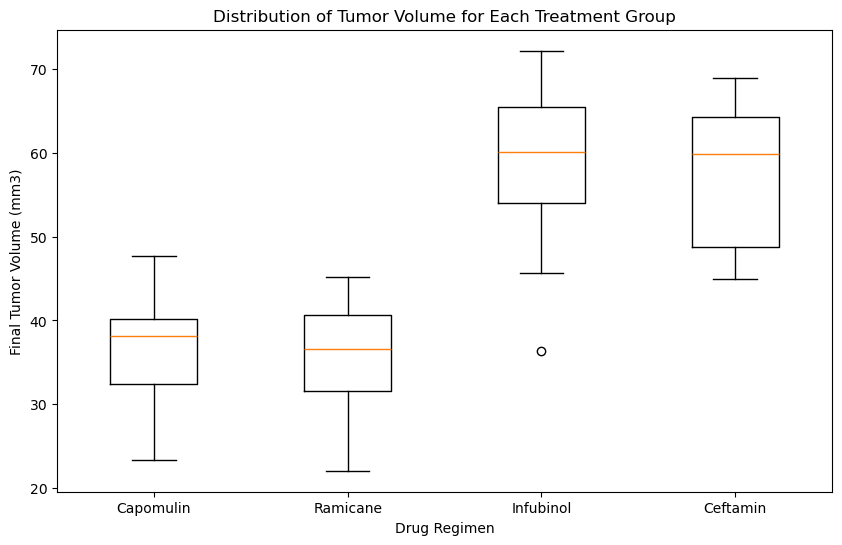

In [17]:
# Import the necessary library for plotting
import matplotlib.pyplot as plt

# Generate a box plot for the distribution of tumor volumes across treatment groups
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_data, labels=treatments)

# Set the title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.show()


## Line and Scatter Plots

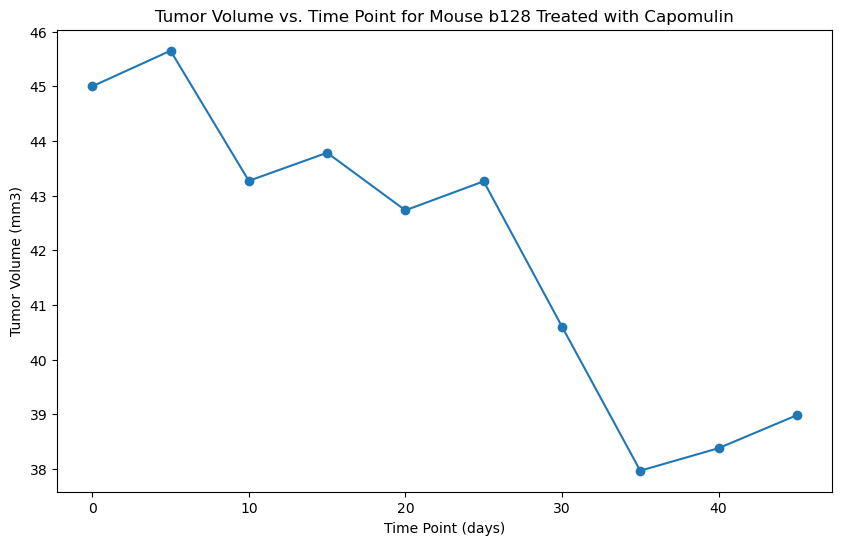

In [32]:
# Select a single mouse treated with Capomulin
# For example, we can select the first mouse in the dataset treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Select a single mouse ID (e.g., the first one in the filtered dataset)
single_mouse_id = capomulin_data['Mouse ID'].iloc[0]

# Filter the data for this specific mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == single_mouse_id]


# Generate a line plot for tumor volume vs. time point
plt.figure(figsize=(10,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Set the title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()


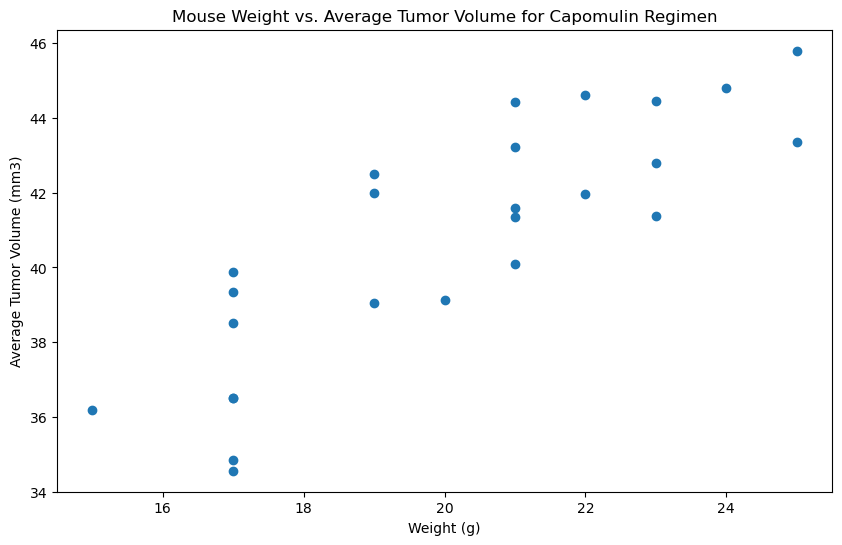

In [34]:
# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge this data with the original Capomulin data to get the mouse weight
merged_data = pd.merge(avg_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Display the merged data to ensure it includes the necessary information
merged_data.head()


# Generate a scatter plot of mouse weight vs. the average observed tumor volume
plt.figure(figsize=(10,6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is: 0.8419363424694722


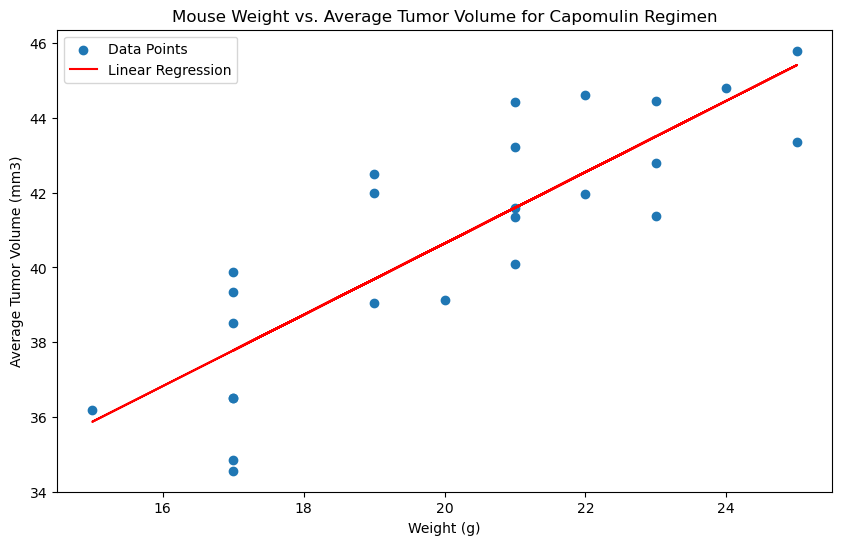

Linear regression equation: Tumor Volume = 0.95 * Weight + 21.55
R-squared value: 0.71


In [36]:
# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

# Display the correlation coefficient
print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation}")


# Import linregress from scipy.stats
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Generate the linear regression equation line
regression_values = merged_data['Weight (g)'] * slope + intercept

# Plot the scatter plot and the regression line
plt.figure(figsize=(10,6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], label='Data Points')
plt.plot(merged_data['Weight (g)'], regression_values, color='red', label='Linear Regression')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Display the plot
plt.show()

# Display the linear regression equation and r-squared value
print(f"Linear regression equation: Tumor Volume = {slope:.2f} * Weight + {intercept:.2f}")
print(f"R-squared value: {r_value**2:.2f}")
